In [1]:
# Set the path
import sys
sys.path.append("/home/ubuntu/ACT")

from act.cell_model import ACTCellModel
from act.simulator import ACTSimulator
from act.act_types import SimulationParameters, ConstantCurrentInjection, FilterParameters, ConductanceOptions, OptimizationParameters
from act.data_processing import ACTDataProcessor as dp
from act.act_module import ACTModule, ACTModuleParameters

import numpy as np
import matplotlib.pyplot as plt

--No graphics will be displayed.


In [ ]:
random_seed = 42
num_slices = 3
experiment_folder = f"output/LAA_original-{num_slices}/{random_seed}"
module_folder = experiment_folder + "/module_final"
target_folder = module_folder + "/target"

target_cell = ACTCellModel(
    path_to_hoc_file="/home/ubuntu/ACT/data/LAA/orig_modfiles/template.hoc",
    path_to_mod_files="/home/ubuntu/ACT/data/LAA/orig_modfiles",
    cell_name="Cell_A",
    passive=["ghdbar_hd","glbar_leak"],
    active_channels=["gbar_nap",
                     "gmbar_im", 
                     "gbar_na3",
                     "gkdrbar_kdr", 
                     "gcabar_cadyn", 
                     "gsAHPbar_sAHP", 
                     "gkabar_kap"]
)

sim_par= SimulationParameters(
            h_v_init=-65.0,  # Consistent with nrngui settings
            h_tstop=1000,     # Simulation time in ms
            h_dt=0.1,      # Time step in ms
            h_celsius=6.3,   # Temperature in degrees Celsius
            CI=[ConstantCurrentInjection(amp=0.040,dur=800,delay=100, lto_hto=1),
                ConstantCurrentInjection(amp=0.045,dur=800,delay=100, lto_hto=1),
                ConstantCurrentInjection(amp=0.050,dur=800,delay=100, lto_hto=1),
                ConstantCurrentInjection(amp=0.055,dur=800,delay=100, lto_hto=1),
                ConstantCurrentInjection(amp=0.060,dur=800,delay=100, lto_hto=1),
                ConstantCurrentInjection(amp=0.0,dur=800,delay=100),
                ConstantCurrentInjection(amp=0.1,dur=800,delay=100),
                ConstantCurrentInjection(amp=0.2,dur=800,delay=100),
                ConstantCurrentInjection(amp=0.3,dur=800,delay=100),
                ConstantCurrentInjection(amp=0.4,dur=800,delay=100),
                ConstantCurrentInjection(amp=4.5,dur=800,delay=100, lto_hto=1),
                ConstantCurrentInjection(amp=5.0,dur=800,delay=100, lto_hto=1),
                ConstantCurrentInjection(amp=5.5,dur=800,delay=100, lto_hto=1),
                ConstantCurrentInjection(amp=6.0,dur=800,delay=100, lto_hto=1),
                ConstantCurrentInjection(amp=6.5,dur=800,delay=100, lto_hto=1)],
            set_g_to=[]
        )

In [3]:
# Set simulations
simulator = ACTSimulator(output_folder_name = ".")

# LTO
for sim_idx, amp_value in enumerate([0.04, 0.045, 0.05, 0.055, 0.06]):
    sim_params = SimulationParameters(
        sim_name = target_folder, 
        sim_idx = sim_idx, 
        h_v_init=-65,
        h_celsius = 6.3,
        h_dt = 0.1,
        h_tstop = 1000,
        CI = [ConstantCurrentInjection(amp = amp_value, dur = 700, delay = 100, lto_hto = 1)])

    simulator.submit_job(target_cell, sim_params)
    
# Normal
for sim_idx, amp_value in enumerate([0.0, 0.1, 0.2, 0.3, 0.4]):
    sim_params = SimulationParameters(
        sim_name = target_folder, 
        sim_idx = sim_idx+5, 
        h_v_init=-65,
        h_celsius = 6.3,
        h_dt = 0.1,
        h_tstop = 1000,
        CI = [ConstantCurrentInjection(amp = amp_value, dur = 700, delay = 100, lto_hto = 0)])
    
    simulator.submit_job(target_cell, sim_params)

#HTO
for sim_idx, amp_value in enumerate([4.5, 5.0, 5.5, 6.0, 6.5]):
    sim_params = SimulationParameters(
        sim_name = target_folder, 
        sim_idx = sim_idx+10, 
        h_v_init=-65,
        h_celsius = 6.3,
        h_dt = 0.1,
        h_tstop = 1000,
        CI = [ConstantCurrentInjection(amp = amp_value, dur = 700, delay = 100, lto_hto = 1)])

    simulator.submit_job(target_cell, sim_params)


        ACTSimulator (2024)
        ----------
        When submitting multiple jobs, note that the cells must share modfiles.
        


In [4]:
simulator.run_jobs(15)

In [5]:
# Combine simulated traces into one dataset for convenience
dp.combine_data(target_folder)

output/LAA_original-3/42/module_final/target


In [6]:
train_cell = ACTCellModel(
    path_to_hoc_file="/home/ubuntu/ACT/data/LAA/orig_modfiles/template.hoc",
    path_to_mod_files="/home/ubuntu/ACT/data/LAA/orig_modfiles",
    cell_name="Cell_A",
    passive=["ghdbar_hd","glbar_leak"],
    active_channels=["gbar_nap",
                     "gmbar_im", 
                     "gbar_na3",
                     "gkdrbar_kdr", 
                     "gcabar_cadyn", 
                     "gsAHPbar_sAHP", 
                     "gkabar_kap"]
)

# Ion Channel Range Randomizer

In [7]:
random_state = np.random.RandomState(123)

glbar_leak = 5.5e-5
ghdbar_hd=2.3e-05
gmbar_im = 0.002
gbar_nap= 0.000142
gbar_na3=0.03
gkdrbar_kdr=0.0015
gcabar_cadyn = 6e-5
gsAHPbar_sAHP = 0.009
gkabar_kap = 0.000843

gbar_nap_range = (gbar_nap - random_state.uniform(0, gbar_nap / 2), gbar_nap + random_state.uniform(0, gbar_nap / 2))
gmbar_im_range = (gmbar_im - random_state.uniform(0, gmbar_im / 2), gmbar_im + random_state.uniform(0, gmbar_im / 2))
gbar_na3_range = (gbar_na3 - random_state.uniform(0, gbar_na3 / 2), gbar_na3 + random_state.uniform(0, gbar_na3 / 2))
gkdrbar_kdr_range = (gkdrbar_kdr - random_state.uniform(0, gkdrbar_kdr / 2), gkdrbar_kdr + random_state.uniform(0, gkdrbar_kdr / 2))
gcabar_cadyn_range = (gcabar_cadyn - random_state.uniform(0, gcabar_cadyn / 2), gcabar_cadyn + random_state.uniform(0, gcabar_cadyn / 2))
gsAHPbar_sAHP_range = (gsAHPbar_sAHP - random_state.uniform(0, gsAHPbar_sAHP / 2), gsAHPbar_sAHP + random_state.uniform(0, gsAHPbar_sAHP / 2))
gkabar_kap_range = (gkabar_kap - random_state.uniform(0, gkabar_kap / 2), gkabar_kap + random_state.uniform(0, gkabar_kap / 2))

In [8]:
mod = ACTModule(
    ACTModuleParameters(
        module_folder_name=module_folder,
        cell= train_cell,
        target_traces_file = f"{target_folder}/combined_out.npy",
        sim_params= sim_par,
        optim_params= OptimizationParameters(
            conductance_options = [
                ConductanceOptions(variable_name="gbar_nap", low=gbar_nap_range[0], high= gbar_nap_range[1], n_slices=num_slices),
                ConductanceOptions(variable_name="gmbar_im", low=gmbar_im_range[0], high= gmbar_im_range[1],  n_slices=num_slices),
                ConductanceOptions(variable_name="gbar_na3", low=gbar_na3_range[0], high= gbar_na3_range[1], n_slices=num_slices),
                ConductanceOptions(variable_name="gbar_kdr", low=gkdrbar_kdr_range[0], high= gkdrbar_kdr_range[1], n_slices=num_slices),
                ConductanceOptions(variable_name="gcabar_cadyn", low= gcabar_cadyn_range[0], high= gcabar_cadyn_range[1], n_slices=num_slices),
                ConductanceOptions(variable_name="gsAHPbar_sAHP", low= gsAHPbar_sAHP_range[0], high= gsAHPbar_sAHP_range[1], n_slices=num_slices),
                ConductanceOptions(variable_name="gkabar_kap", low= gkabar_kap_range[0], high= gkabar_kap_range[1], n_slices=num_slices)
            ],
            train_features=["i_trace_stats", "number_of_spikes", "spike_times", "spike_height_stats", "trough_times", "trough_height_stats", "lto-hto_amplitude", "lto-hto_frequency"],
            prediction_eval_method='features',
            save_file=f"{module_folder}/results/saved_metrics.json"
        )
    )
)

In [9]:
predicted_g_data_file = mod.run()

RUNNING THE MODULE
LOADING TARGET TRACES
SIMULATING TRAINING DATA

        ACTSimulator (2024)
        ----------
        When submitting multiple jobs, note that the cells must share modfiles.
        
/home/ubuntu/ACT/experiments/LA_A/not-filtered/output/LAA_original-3/42/module_final/train
TRAINING RANDOM FOREST REGRESSOR
Extracting features: ['I_mean', 'I_stdev', 'Num Spikes', 'Spike Time 1', 'Spike Time 2', 'Spike Time 3', 'Spike Time 4', 'Spike Time 5', 'Spike Time 6', 'Spike Time 7', 'Spike Time 8', 'Spike Time 9', 'Spike Time 10', 'Spike Time 11', 'Spike Time 12', 'Spike Time 13', 'Spike Time 14', 'Spike Time 15', 'Spike Time 16', 'Spike Time 17', 'Spike Time 18', 'Spike Time 19', 'Spike Time 20', 'Min Spike Height', 'Max Spike Height', 'Avg Spike Height', 'Std Spike Height', 'Trough Time 1', 'Trough Time 2', 'Trough Time 3', 'Trough Time 4', 'Trough Time 5', 'Trough Time 6', 'Trough Time 7', 'Trough Time 8', 'Trough Time 9', 'Trough Time 10', 'Trough Time 11', 'Trough Time 12'

In [10]:
mod.pickle_rf(mod.rf_model,f"{module_folder}/trained_rf.pkl")
print(train_cell.active_channels)

{'gbar_nap': 0.00011466625779453031, 'gmbar_im': 0.0021711805693198126, 'gbar_na3': 0.029679669268342264, 'gbar_kdr': 0.0014652255001914491, 'gcabar_cadyn': 5.8759454439712956e-05, 'gsAHPbar_sAHP': 0.008840481032266355, 'gkabar_kap': 0.0007700784264844957}


# Results & Metrics

In [11]:
from act import ACTPlot
ACTPlot.plot_v_comparison(
    module_folder,
    predicted_g_data_file, 
    sim_par.CI,
    sim_par.h_dt
    )

ACTPlot.plot_fi_comparison(
    module_folder, 
    sim_par.CI
    )

In [12]:
from act.Metrics import Metrics

metrics = Metrics()

mean, stdev = metrics.save_interspike_interval_comparison(
    module_folder,
    predicted_g_data_file,
    sim_par.CI, 
    sim_par.h_dt,
    first_n_spikes=5,
    save_file=f"{module_folder}/results/saved_metrics.json"
)

'''
gmbar_im = 0.002
gbar_nap= 0.000142
gbar_na3=0.03
gkdrbar_kdr=0.0015
gcabar_cadyn = 6e-5
gsAHPbar_sAHP = 0.009
gkabar_kap = 0.000843
'''

actual_g={"gbar_nap": 0.000142, "gmbar_im": 0.002, "gbar_na3":0.03,"gkdrbar_kdr":0.0015, "gcabar_cadyn": 6e-5, "gsAHPbar_sAHP": 0.009, "gkabar_kap": 0.000843}

    
metrics.save_prediction_g_mae(
    actual_g=actual_g,
    save_file=f"{module_folder}/results/saved_metrics.json"
)

metrics.save_feature_mae(
    module_folder,
    predicted_g_data_file,
    ["i_trace_stats", "number_of_spikes", "spike_times", "spike_height_stats", "trough_times", "trough_height_stats", "lto-hto_amplitude", "lto-hto_frequency"],
    sim_par.h_dt,
    first_n_spikes=5,
    CI_settings=sim_par.CI,
    save_file=f"{module_folder}/results/saved_metrics.json"
)


Interspike times (Target): [[1.000e+06 1.000e+06 1.000e+06 1.000e+06]
 [1.000e+06 1.000e+06 1.000e+06 1.000e+06]
 [1.000e+06 1.000e+06 1.000e+06 1.000e+06]
 [1.000e+06 1.000e+06 1.000e+06 1.000e+06]
 [1.000e+06 1.000e+06 1.000e+06 1.000e+06]
 [1.000e+06 1.000e+06 1.000e+06 1.000e+06]
 [1.000e+06 1.000e+06 1.000e+06 1.000e+06]
 [8.360e+01 1.000e+06 1.000e+06 1.000e+06]
 [6.730e+01 1.000e+06 1.000e+06 1.000e+06]
 [5.940e+01 7.640e+01 1.000e+06 1.000e+06]
 [2.434e+02 1.756e+02 1.692e+02 1.000e+06]
 [2.504e+02 2.223e+02 1.000e+06 1.000e+06]
 [3.022e+02 2.823e+02 1.000e+06 1.000e+06]
 [1.000e+06 1.000e+06 1.000e+06 1.000e+06]
 [1.000e+06 1.000e+06 1.000e+06 1.000e+06]]
Interspike times (Prediction): [[1.000e+06 1.000e+06 1.000e+06 1.000e+06]
 [1.000e+06 1.000e+06 1.000e+06 1.000e+06]
 [1.000e+06 1.000e+06 1.000e+06 1.000e+06]
 [1.000e+06 1.000e+06 1.000e+06 1.000e+06]
 [1.000e+06 1.000e+06 1.000e+06 1.000e+06]
 [1.000e+06 1.000e+06 1.000e+06 1.000e+06]
 [1.000e+06 1.000e+06 1.000e+06 1.000e

Smallest MAE values (gbar_nap, gmbar_im, Summary Stats MAE): 
[[1.62315893e-04 1.77314855e-03 5.78550549e+04]
 [1.62315893e-04 1.77314855e-03 5.78550567e+04]
 [1.62315893e-04 1.77314855e-03 5.78550597e+04]
 [1.62315893e-04 1.77314855e-03 5.78550753e+04]
 [1.62315893e-04 1.77314855e-03 5.91118505e+04]
 [1.62315893e-04 1.77314855e-03 5.91118541e+04]]


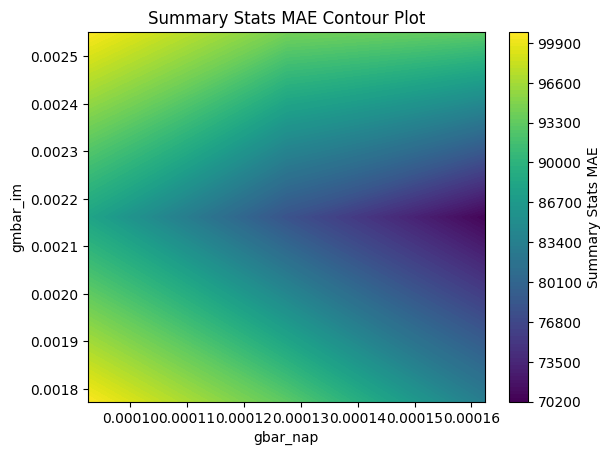

Smallest MAE values (gbar_nap, gbar_na3, Summary Stats MAE): 
[[1.62315893e-04 2.77772812e-02 5.78550549e+04]
 [1.62315893e-04 2.77772812e-02 5.78550567e+04]
 [1.62315893e-04 2.77772812e-02 5.78550597e+04]
 [1.62315893e-04 2.77772812e-02 5.78550753e+04]
 [1.62315893e-04 2.77772812e-02 5.91118505e+04]
 [1.62315893e-04 2.77772812e-02 5.91118541e+04]]


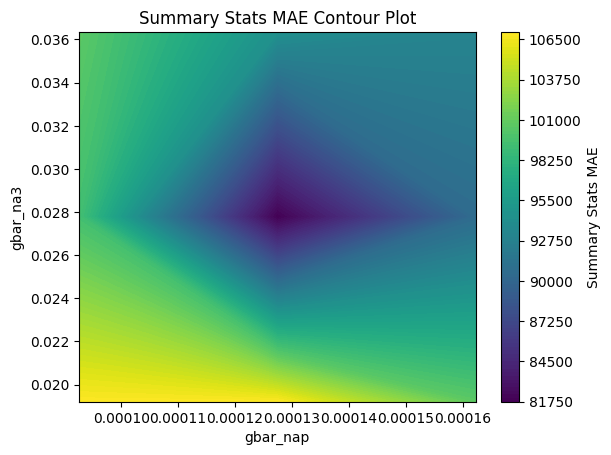

Smallest MAE values (gbar_nap, gkdrbar_kdr, Summary Stats MAE): 
[[1.62315893e-04 2.01362230e-03 5.78550549e+04]
 [1.62315893e-04 2.01362230e-03 5.78550567e+04]
 [1.62315893e-04 2.01362230e-03 5.78550597e+04]
 [1.62315893e-04 1.38902458e-03 5.78550753e+04]
 [1.62315893e-04 1.38902458e-03 5.91118505e+04]
 [1.62315893e-04 1.38902458e-03 5.91118541e+04]]


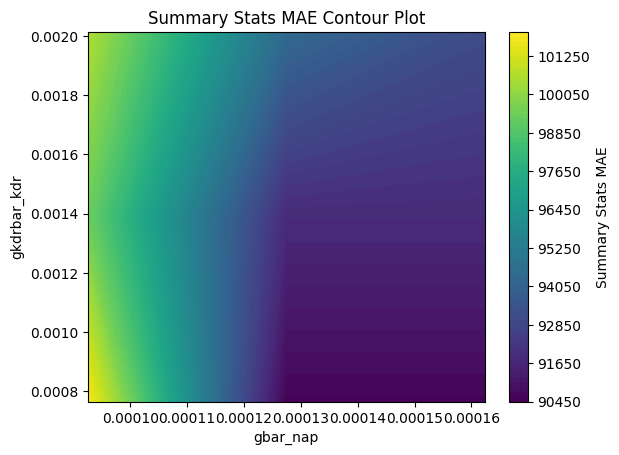

Smallest MAE values (gbar_nap, gcabar_cadyn, Summary Stats MAE): 
[[1.62315893e-04 4.55720430e-05 5.78550549e+04]
 [1.62315893e-04 4.55720430e-05 5.78550567e+04]
 [1.62315893e-04 4.55720430e-05 5.78550597e+04]
 [1.62315893e-04 4.55720430e-05 5.78550753e+04]
 [1.62315893e-04 4.55720430e-05 5.91118505e+04]
 [1.62315893e-04 4.55720430e-05 5.91118541e+04]]


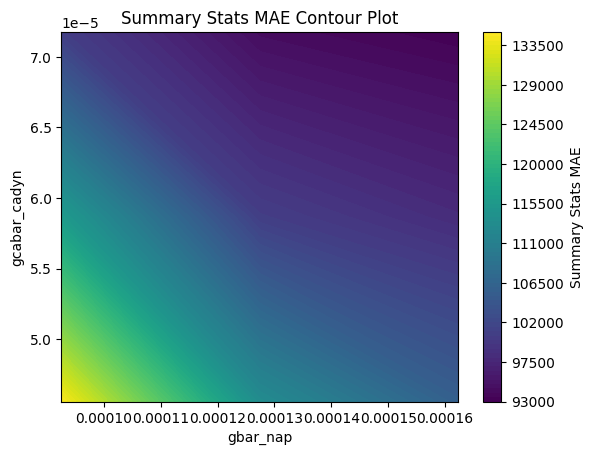

Smallest MAE values (gbar_nap, gsAHPbar_sAHP, Summary Stats MAE): 
[[1.62315893e-04 9.86821131e-03 5.78550549e+04]
 [1.62315893e-04 9.86821131e-03 5.78550567e+04]
 [1.62315893e-04 9.86821131e-03 5.78550597e+04]
 [1.62315893e-04 9.86821131e-03 5.78550753e+04]
 [1.62315893e-04 9.86821131e-03 5.91118505e+04]
 [1.62315893e-04 9.86821131e-03 5.91118541e+04]]


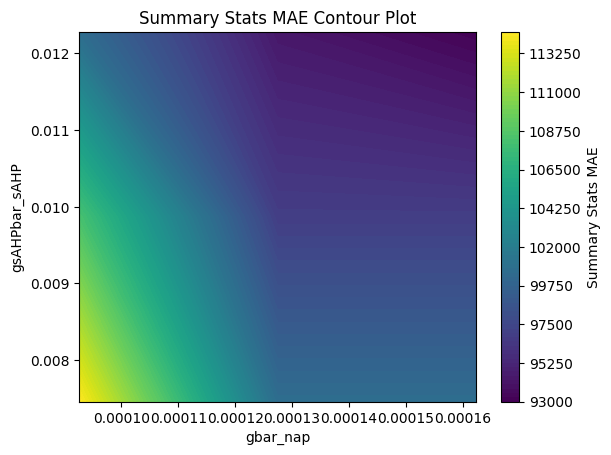

Smallest MAE values (gbar_nap, gkabar_kap, Summary Stats MAE): 
[[1.62315893e-04 8.68154233e-04 5.78550549e+04]
 [1.62315893e-04 7.63148016e-04 5.78550567e+04]
 [1.62315893e-04 6.58141799e-04 5.78550597e+04]
 [1.62315893e-04 6.58141799e-04 5.78550753e+04]
 [1.62315893e-04 8.68154233e-04 5.91118505e+04]
 [1.62315893e-04 7.63148016e-04 5.91118541e+04]]


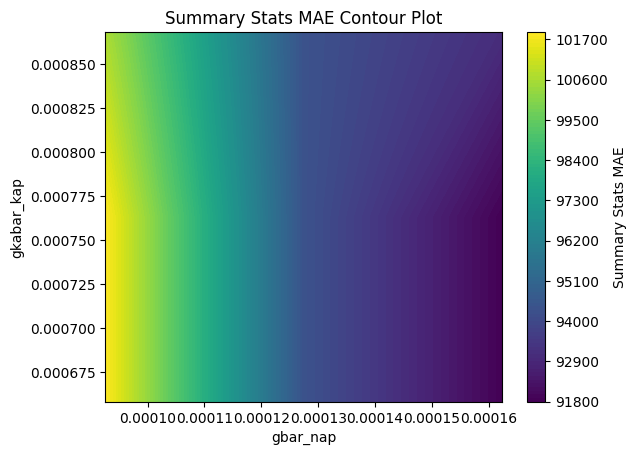

In [13]:
from act import ACTPlot as actplt

g_names = ["gbar_nap",
            "gmbar_im", 
            "gbar_na3",
            "gkdrbar_kdr", 
            "gcabar_cadyn", 
            "gsAHPbar_sAHP", 
            "gkabar_kap"]

for i in range(len(g_names)-1):
    actplt.plot_training_feature_mae_contour_plot(
        module_folder,
        sim_par.CI,
        sim_par.CI[0].delay,
        sim_par.h_dt,
        index1=0,
        index2=i+1,
        g_names=g_names,
        train_features=["i_trace_stats", "number_of_spikes", "spike_times", "spike_height_stats", "trough_times", "trough_height_stats", "lto-hto_amplitude", "lto-hto_frequency"],
        threshold=0,
        first_n_spikes=20,
        num_levels=100,
        results_filename=f"{module_folder}/results/Feature_MAE_Contour_Plot_{g_names[0]}_{g_names[i+1]}.png"
    )

Smallest FI MAE values (gbar_nap, gmbar_im, FI MAE): 
[[1.27433290e-04 1.77314855e-03 8.66666667e+00]
 [1.62315893e-04 1.77314855e-03 8.83333333e+00]
 [1.27433290e-04 1.77314855e-03 9.00000000e+00]
 [1.27433290e-04 1.77314855e-03 9.16666667e+00]
 [1.27433290e-04 1.77314855e-03 9.16666667e+00]
 [1.27433290e-04 1.77314855e-03 9.16666667e+00]]


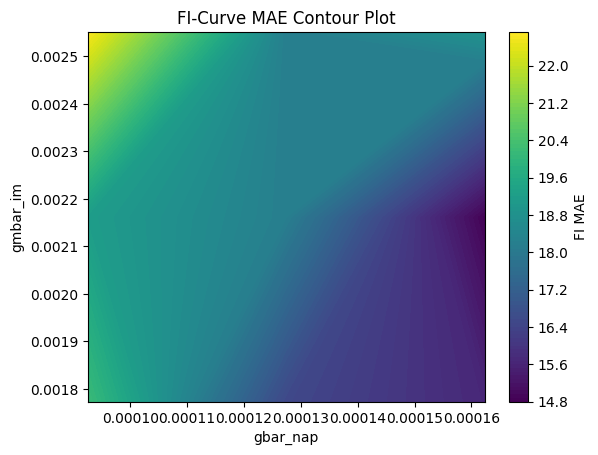

Smallest FI MAE values (gbar_nap, gbar_na3, FI MAE): 
[[1.27433290e-04 2.77772812e-02 8.66666667e+00]
 [1.62315893e-04 2.77772812e-02 8.83333333e+00]
 [1.27433290e-04 2.77772812e-02 9.00000000e+00]
 [1.27433290e-04 2.77772812e-02 9.16666667e+00]
 [1.27433290e-04 2.77772812e-02 9.16666667e+00]
 [1.27433290e-04 2.77772812e-02 9.16666667e+00]]


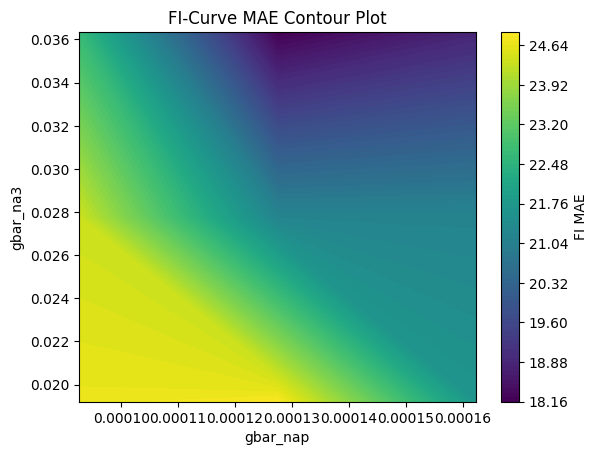

Smallest FI MAE values (gbar_nap, gkdrbar_kdr, FI MAE): 
[[1.27433290e-04 2.01362230e-03 8.66666667e+00]
 [1.62315893e-04 2.01362230e-03 8.83333333e+00]
 [1.27433290e-04 1.38902458e-03 9.00000000e+00]
 [1.27433290e-04 2.01362230e-03 9.16666667e+00]
 [1.27433290e-04 2.01362230e-03 9.16666667e+00]
 [1.27433290e-04 1.38902458e-03 9.16666667e+00]]


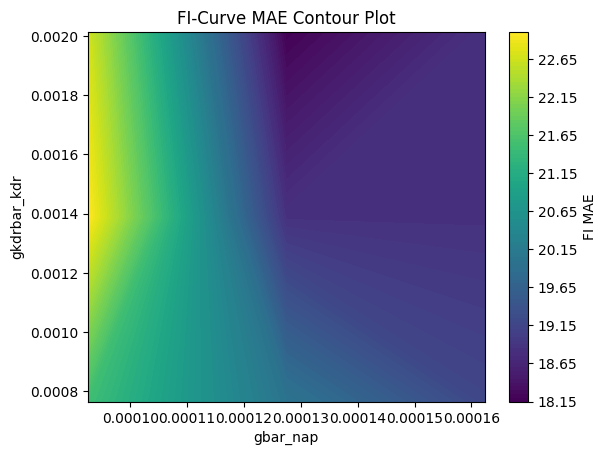

Smallest FI MAE values (gbar_nap, gcabar_cadyn, FI MAE): 
[[1.27433290e-04 4.55720430e-05 8.66666667e+00]
 [1.62315893e-04 4.55720430e-05 8.83333333e+00]
 [1.27433290e-04 4.55720430e-05 9.00000000e+00]
 [1.27433290e-04 4.55720430e-05 9.16666667e+00]
 [1.27433290e-04 4.55720430e-05 9.16666667e+00]
 [1.27433290e-04 4.55720430e-05 9.16666667e+00]]


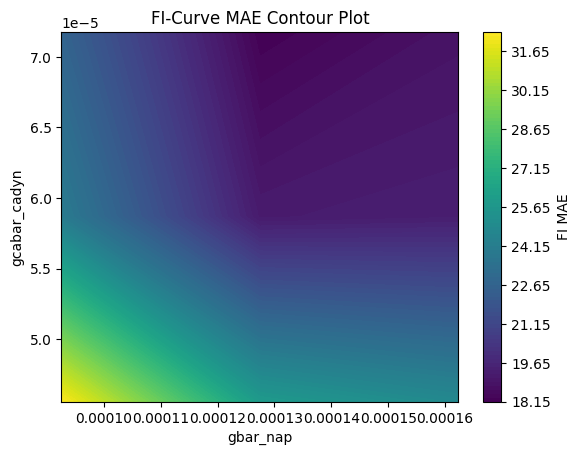

Smallest FI MAE values (gbar_nap, gsAHPbar_sAHP, FI MAE): 
[[1.27433290e-04 7.45569893e-03 8.66666667e+00]
 [1.62315893e-04 7.45569893e-03 8.83333333e+00]
 [1.27433290e-04 7.45569893e-03 9.00000000e+00]
 [1.27433290e-04 7.45569893e-03 9.16666667e+00]
 [1.27433290e-04 7.45569893e-03 9.16666667e+00]
 [1.27433290e-04 7.45569893e-03 9.16666667e+00]]


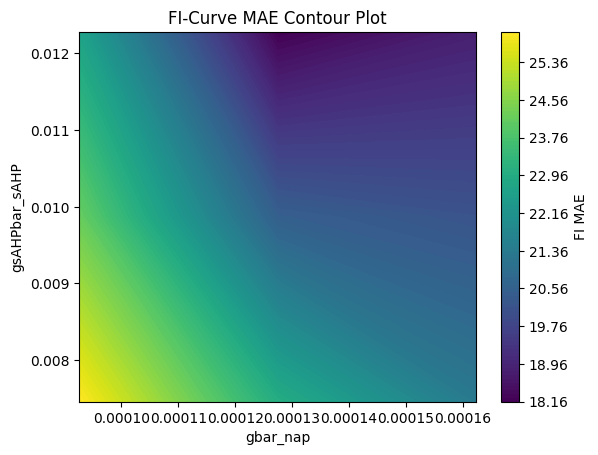

Smallest FI MAE values (gbar_nap, gkabar_kap, FI MAE): 
[[1.27433290e-04 8.68154233e-04 8.66666667e+00]
 [1.62315893e-04 8.68154233e-04 8.83333333e+00]
 [1.27433290e-04 8.68154233e-04 9.00000000e+00]
 [1.27433290e-04 6.58141799e-04 9.16666667e+00]
 [1.27433290e-04 7.63148016e-04 9.16666667e+00]
 [1.27433290e-04 7.63148016e-04 9.16666667e+00]]


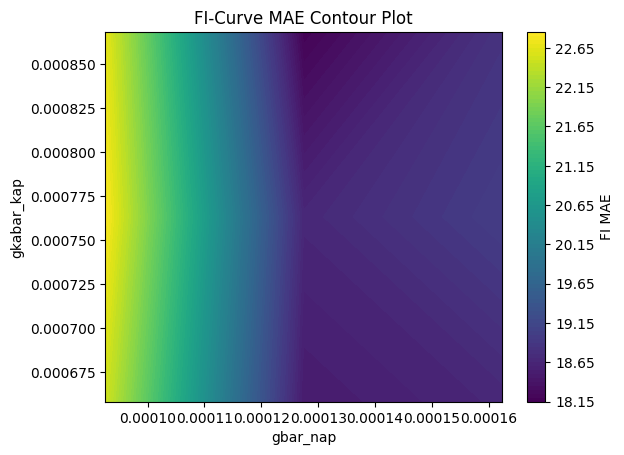

In [14]:
from act import ACTPlot as actplt

g_names = ["gbar_nap",
            "gmbar_im", 
            "gbar_na3",
            "gkdrbar_kdr", 
            "gcabar_cadyn", 
            "gsAHPbar_sAHP", 
            "gkabar_kap"]

for i in range(len(g_names)-1):
    actplt.plot_training_fi_mae_contour_plot(
        module_folder,
        sim_par.CI, 
        sim_par.CI[0].delay,
        sim_par.h_dt,
        index1=0,
        index2=i+1,
        g_names=g_names,
        spike_threshold=0,
        results_filename=f"{module_folder}/results/FI_MAE_Contour_Plot_{g_names[0]}_{g_names[i+1]}.png"
    )

Smallest MAE values (gbar_na3, gkdrbar_kdr, V MAE): 
[[1.62315893e-04 1.77314855e-03 5.83604255e+00]
 [1.62315893e-04 1.77314855e-03 5.84916223e+00]
 [1.62315893e-04 1.77314855e-03 5.86930142e+00]
 [1.62315893e-04 1.77314855e-03 5.88962267e+00]
 [1.62315893e-04 1.77314855e-03 5.89225017e+00]
 [1.62315893e-04 1.77314855e-03 5.90859491e+00]]


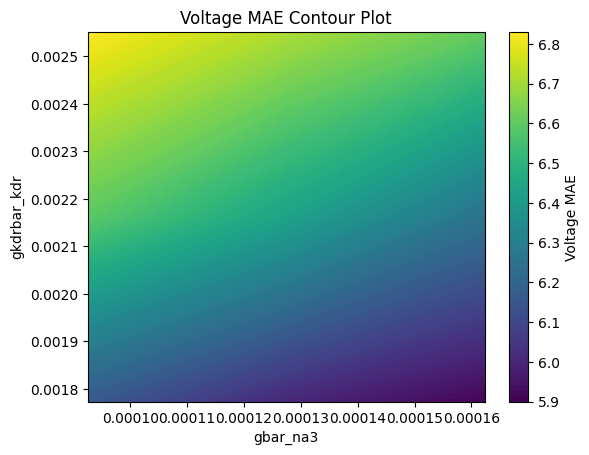

Smallest MAE values (gbar_na3, gbar_nap, V MAE): 
[[1.62315893e-04 3.63465969e-02 5.83604255e+00]
 [1.62315893e-04 2.77772812e-02 5.84916223e+00]
 [1.62315893e-04 2.77772812e-02 5.86930142e+00]
 [1.62315893e-04 2.77772812e-02 5.88962267e+00]
 [1.62315893e-04 3.63465969e-02 5.89225017e+00]
 [1.62315893e-04 3.63465969e-02 5.90859491e+00]]


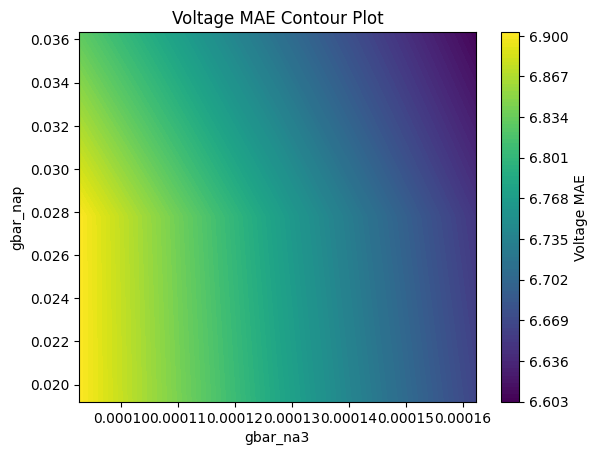

Smallest MAE values (gbar_na3, gmbar_im, V MAE): 
[[1.62315893e-04 7.64426851e-04 5.83604255e+00]
 [1.62315893e-04 7.64426851e-04 5.84916223e+00]
 [1.62315893e-04 1.38902458e-03 5.86930142e+00]
 [1.62315893e-04 2.01362230e-03 5.88962267e+00]
 [1.62315893e-04 1.38902458e-03 5.89225017e+00]
 [1.62315893e-04 2.01362230e-03 5.90859491e+00]]


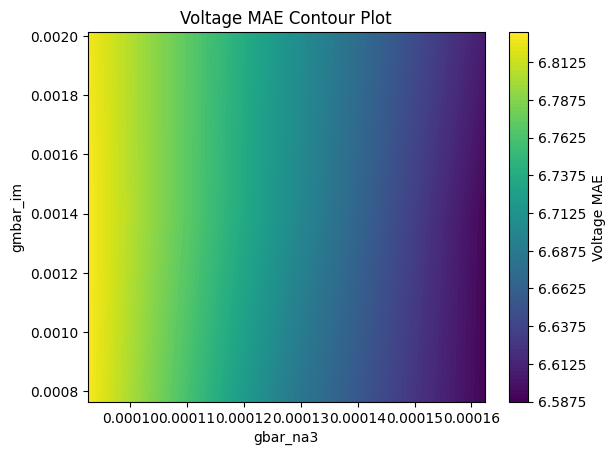

In [15]:
from act import ACTPlot as actplt

g_names = ["gbar_na3", "gkdrbar_kdr","gbar_nap","gmbar_im"]

for i in range(len(g_names)-1):
    actplt.plot_training_v_mae_contour_plot(
        module_folder,
        sim_par.CI, 
        sim_par.CI[0].delay,
        sim_par.h_dt,
        index1=0,
        index2=i+1,
        g_names=g_names,
        results_filename=f"{module_folder}/results/Voltage_MAE_Contour_Plot_{g_names[0]}_{g_names[i+1]}.png"
    )